<a href="https://colab.research.google.com/github/kevinbui0410/ML4MK/blob/main/B%C3%A0i_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Business Understanding**

Phân cụm khách hàng dựa vào cột LoanAmount(đon vị tính: thousand và cột ApplicantIncome)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Step 2:Data Understanding/Acquire**

Data đã được cung cấp trong file clustering, gồm hơn 382 dòng và nhiều cột



**Step 3: Data prepartion/Prepare**

In [ ]:
path = '/content/drive/My Drive/LDS6_Bui_Thanh_Quang/LDS6_Bui_Thanh_Quang_Thi/'

In [ ]:
data = pd.read_csv(path+'data/clustering.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


**Trực quan hóa kiểm tra dữ liệu 2 cột thực hiện phân cụm: ApplicantIncome và LoanAmount**

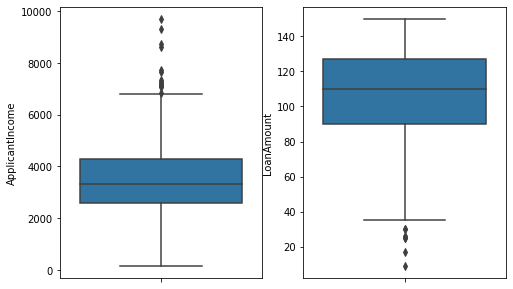

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(y=data.ApplicantIncome, orient='v')
plt.subplot(1,2,2)
sns.boxplot(y=data.LoanAmount, orient='v')
plt.show()

Có outlier, kiểm tra phân phối

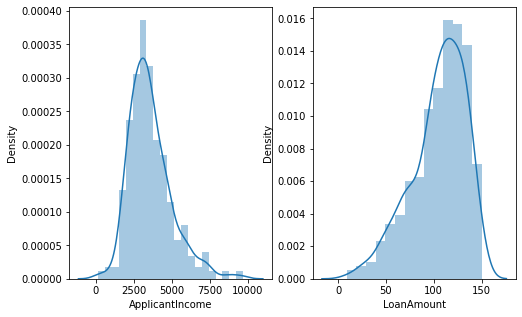

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(data.ApplicantIncome)
plt.subplot(1,2,2)
sns.distplot(data.LoanAmount)
plt.show()

In [ ]:
data.skew()

ApplicantIncome      1.119751
CoapplicantIncome    8.660692
LoanAmount          -0.804282
Loan_Amount_Term    -2.204931
Credit_History      -1.838651
dtype: float64

In [ ]:
data.kurtosis()

ApplicantIncome        2.063464
CoapplicantIncome    108.590665
LoanAmount             0.224007
Loan_Amount_Term       5.778382
Credit_History         1.388518
dtype: float64

Data có outlier

Không theo phân phối Gaussian

Dùng RobustScaler để chuẩn hóa

In [ ]:
from sklearn.preprocessing import RobustScaler
rbScaler = RobustScaler()
rbScaler.fit(data[['LoanAmount','ApplicantIncome']])
data_sub = rbScaler.transform(data[['LoanAmount','ApplicantIncome']])

In [ ]:
data_sub_robust_scaler = pd.DataFrame(data_sub,columns=['rb_LoanAmount','rb_ApplicantIncome'])
data = pd.concat([data.reset_index(drop=True),data_sub_robust_scaler],axis=1)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rb_LoanAmount,rb_ApplicantIncome
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417


**Step 4: Modeling & Evaluation/ Analyze & Report**

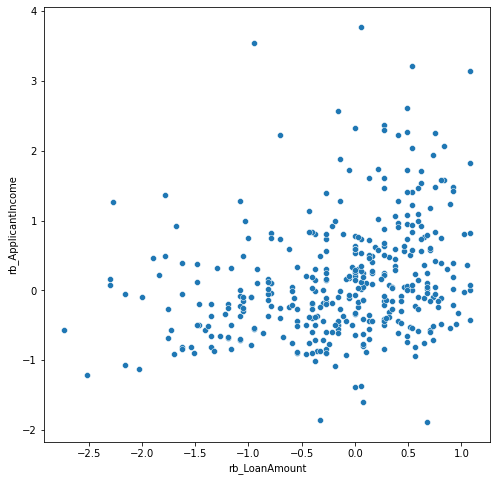

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x='rb_LoanAmount',y='rb_ApplicantIncome')
plt.show()

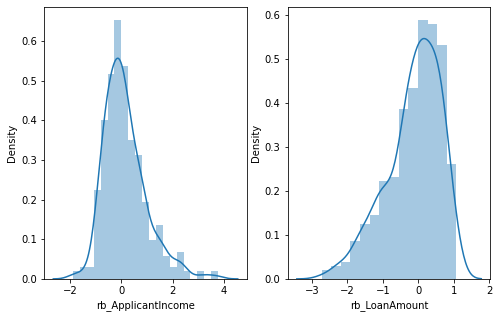

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.distplot(data.rb_ApplicantIncome)
plt.subplot(1,2,2)
sns.distplot(data.rb_LoanAmount)
plt.show()

**Chọn KMeans vì dữ liệu tương đối lớn so với hierarchical nhưng không đủ để thực hiện GMM**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
K = range(1,8)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data[['rb_ApplicantIncome','rb_LoanAmount']])
  distortions.append(sum(np.min(cdist(data[['rb_ApplicantIncome','rb_LoanAmount']],kmeanModel.cluster_centers_,'euclidean'),axis=1))/data[['rb_ApplicantIncome','rb_LoanAmount']].shape[0])
distortions

[0.9762880737298799,
 0.7563989626346153,
 0.6153069108114854,
 0.5338853299043959,
 0.47483631558558986,
 0.4424925856399869,
 0.415592313165]

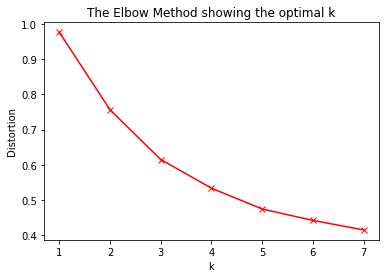

In [ ]:
plt.plot(K, distortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Chọn k=4 vì lỗi giảm dần và mịn**

In [ ]:
# 
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['rb_ApplicantIncome','rb_LoanAmount']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print('Centroids in robust scaler:')
print(centroids)
print('Centroids in normal:')
normal_centroids = rbScaler.inverse_transform(centroids) # chuyen min max scaler ve gia tri ban dau
print(normal_centroids)
print(labels)


Centroids in robust scaler:
[[-0.51881912  0.03693694]
 [-0.16293512 -1.277726  ]
 [ 1.92696979  0.40405405]
 [ 0.41097386  0.29064139]]
Centroids in normal:
[[  90.80369273 3395.34954955]
 [ 103.97140056 1176.19850885]
 [ 181.29788211 4015.04324324]
 [ 125.20603293 3823.60266236]]
[3 1 0 2 0 1 0 0 1 3 3 1 3 0 2 0 3 0 3 1 3 1 3 3 0 3 3 1 1 1 3 3 1 1 2 0 3
 0 0 3 3 0 0 3 3 0 0 3 3 2 3 0 1 3 3 0 3 3 1 0 0 0 0 1 3 1 0 1 3 0 3 0 2 0
 2 0 3 0 1 0 1 3 1 1 1 3 3 1 3 0 0 1 3 2 0 1 0 0 0 2 3 0 1 0 1 3 3 0 3 0 1
 1 3 1 1 1 1 3 0 3 0 3 3 3 1 1 1 3 3 2 3 3 0 3 1 3 1 3 3 2 3 0 1 0 3 3 3 0
 2 0 2 3 2 2 2 0 0 3 0 2 3 3 0 2 3 3 3 0 1 0 0 3 0 1 3 3 1 1 1 0 3 3 3 3 3
 2 3 3 0 0 0 3 0 3 3 0 1 0 1 2 3 3 0 3 0 3 3 3 3 1 3 0 1 1 1 1 1 0 0 0 2 0
 3 1 0 1 3 0 2 2 0 3 0 0 3 2 3 1 2 3 2 3 3 0 0 2 0 0 0 3 1 0 3 0 1 1 0 1 3
 0 1 1 0 1 0 3 2 1 0 2 0 1 2 1 1 2 2 0 3 1 2 3 3 3 1 3 0 1 3 0 2 3 3 3 2 3
 3 2 1 0 3 0 3 0 0 0 0 0 1 1 0 3 3 0 0 3 0 0 0 3 3 3 3 3 1 3 0 0 0 1 1 2 3
 0 2 3 3 0 3 1 3 0 3 0 0 1 0 3 0 3 1 1 3 2

**Report**

In [ ]:
data["Group"] = pd.Series(labels)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rb_LoanAmount,rb_ApplicantIncome,Group
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521,3
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313,0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976,2
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417,0


In [ ]:
data.Group.value_counts()

3    134
0    120
1     87
2     40
Name: Group, dtype: int64

In [ ]:
i = 0
for cluster in normal_centroids:
  print('Centroid Cluster:'+str(i))
  print('LoanAmount:',round(cluster[0],2))
  print('ApplicantIncome:',round(cluster[1],2))
  i = i+1

Centroid Cluster:0
LoanAmount: 90.8
ApplicantIncome: 3395.35
Centroid Cluster:1
LoanAmount: 103.97
ApplicantIncome: 1176.2
Centroid Cluster:2
LoanAmount: 181.3
ApplicantIncome: 4015.04
Centroid Cluster:3
LoanAmount: 125.21
ApplicantIncome: 3823.6


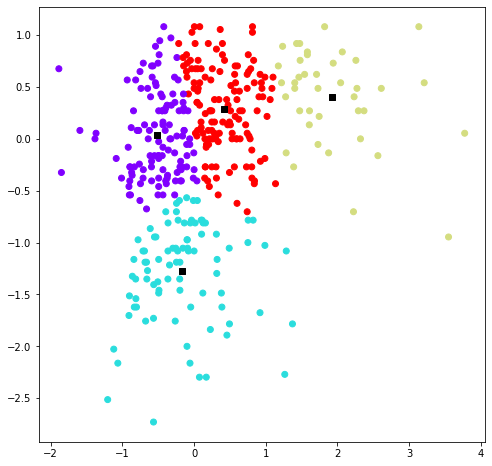

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(data.rb_ApplicantIncome,data.rb_LoanAmount, c=data.Group, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], marker='s',c='black')
plt.show()

In [ ]:

for i in range(4):
  print('Group:',i)
  print('min LoanAmount = ',data[data['Group']==i]['LoanAmount'].min())
  print('max LoanAmount = ',data[data['Group']==i]['LoanAmount'].max())
  print('min ApplicantIncome = ',data[data['Group']==i]['ApplicantIncome'].min())
  print('max ApplicantIncome = ',data[data['Group']==i]['ApplicantIncome'].max())
  print('*'*30)

Group: 0
min LoanAmount =  85.0
max LoanAmount =  150.0
min ApplicantIncome =  150
max ApplicantIncome =  3400
******************************
Group: 1
min LoanAmount =  9.0
max LoanAmount =  89.0
min ApplicantIncome =  1299
max ApplicantIncome =  5649
******************************
Group: 2
min LoanAmount =  75.0
max LoanAmount =  150.0
min ApplicantIncome =  5316
max ApplicantIncome =  9703
******************************
Group: 3
min LoanAmount =  84.0
max LoanAmount =  150.0
min ApplicantIncome =  2971
max ApplicantIncome =  5250
******************************


**Dữ liệu chia thành 4 nhóm**

**Nhóm những người có LoanAmount thấp, ApplicantIncome trung bình**

**Nhóm những người có LoanAmount cao, ApplicantIncome thấp**

**Nhóm những người có LoanAmount cao, ApplicantIncome cao**

**Nhóm những người có LoanAmount cao, ApplicantIncome trung bình**

**Yêu cầu 2: Chọn thêm cột gender để thực hiện phân cụm**

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rb_LoanAmount,rb_ApplicantIncome,Group
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521,3
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313,0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976,2
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417,0


In [ ]:
# chuyen cot gender thanh cot du lieu kieu so
data['Gender_Male'] = pd.get_dummies(data['Gender'], drop_first=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rb_LoanAmount,rb_ApplicantIncome,Group,Gender_Male
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521,3,1
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275,1,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313,0,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976,2,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417,0,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
K = range(2,8)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data[['rb_ApplicantIncome','rb_LoanAmount','Gender_Male']])
  distortions.append(sum(np.min(cdist(data[['rb_ApplicantIncome','rb_LoanAmount','Gender_Male']],kmeanModel.cluster_centers_,'euclidean'),axis=1))/data[['rb_ApplicantIncome','rb_LoanAmount','Gender_Male']].shape[0])
distortions

[0.8789063990724097,
 0.7474988131425553,
 0.677010604020581,
 0.5959446255235864,
 0.5578433116318132,
 0.5233748732273364]

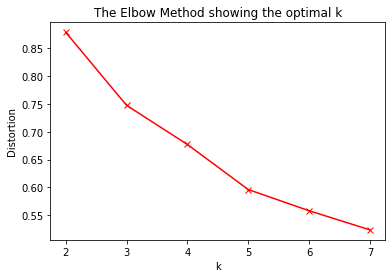

In [ ]:
plt.plot(K, distortions, 'rx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Chọn k=5 vì lỗi giảm dần và mịn**

In [ ]:
# 
kmeans_3 = KMeans(n_clusters=5)
kmeans_3.fit(data[['rb_ApplicantIncome','rb_LoanAmount','Gender_Male']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroids_3 = kmeans_3.cluster_centers_
labels_3 = kmeans.labels_
print('Centroids in robust scaler:')
print(centroids_3)
print(labels_3)


Centroids in robust scaler:
[[-1.88850249e-01 -1.35591436e+00  7.66233766e-01]
 [ 1.94346215e+00  4.17879418e-01  8.97435897e-01]
 [-5.45961690e-01 -2.98423423e-02  9.68750000e-01]
 [ 3.65754876e-01  3.23284823e-01  1.00000000e+00]
 [ 1.35936930e-01  8.81496881e-02  8.88178420e-16]]
[0 2 4 1 4 2 4 4 2 0 0 2 0 4 1 4 3 4 0 2 3 2 0 0 4 3 0 2 2 2 0 0 3 2 1 3 3
 4 3 3 0 4 4 0 0 4 4 3 0 1 3 4 2 0 0 4 0 3 2 4 4 4 0 2 0 2 3 2 0 4 0 4 1 4
 1 3 0 4 2 3 2 3 2 2 2 0 3 4 0 4 3 2 0 1 4 2 4 4 0 1 3 4 2 4 2 0 0 4 0 4 2
 2 3 2 2 2 2 0 3 3 4 0 0 3 3 2 2 0 0 1 0 0 4 0 2 3 2 0 0 1 0 4 2 0 0 3 3 4
 1 4 1 0 1 1 1 4 4 3 4 1 0 0 4 1 0 0 3 3 2 4 0 0 4 2 3 0 2 2 4 3 0 3 0 0 0
 1 0 3 4 4 4 3 4 0 3 3 3 4 2 1 0 0 4 3 4 0 3 0 3 2 0 4 2 2 2 2 2 4 0 4 3 3
 3 2 4 3 0 4 1 1 4 0 4 3 0 1 0 2 1 0 1 0 0 4 4 1 4 4 4 0 2 4 0 4 2 2 4 2 3
 4 2 2 4 2 4 0 1 2 4 1 4 3 1 4 2 1 1 4 0 2 1 0 0 0 2 0 4 2 0 4 1 0 0 0 1 3
 0 1 2 4 0 4 0 3 3 4 4 4 2 2 4 0 0 3 4 0 4 4 3 0 0 3 0 0 2 0 3 0 3 2 2 1 0
 4 1 0 0 4 0 2 3 3 3 4 3 2 4 3 4 0 2 3 0 

**Report**

In [ ]:
data["Group_3"] = pd.Series(labels_3)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rb_LoanAmount,rb_ApplicantIncome,Group,Gender_Male,Group_3
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.486486,0.740521,3,1,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-1.189189,-0.197275,1,1,2
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.270270,-0.444313,0,1,4
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.837838,1.579976,2,1,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,-0.405405,-0.592417,0,1,4


In [ ]:
data.Group_3.value_counts()

0    104
4     97
2     77
3     64
1     39
Name: Group_3, dtype: int64

In [ ]:
for i in range(5):
  print('Group:',i)
  print('min LoanAmount = ',data[data['Group_3']==i]['LoanAmount'].min())
  print('max LoanAmount = ',data[data['Group_3']==i]['LoanAmount'].max())
  print('min ApplicantIncome = ',data[data['Group_3']==i]['ApplicantIncome'].min())
  print('max ApplicantIncome = ',data[data['Group_3']==i]['ApplicantIncome'].max())
  print('Gender',data[data['Group_3']==i]['Gender_Male'].unique())
  print('*'*30)

Group: 0
min LoanAmount =  87.0
max LoanAmount =  150.0
min ApplicantIncome =  2620
max ApplicantIncome =  5250
Gender [1]
******************************
Group: 1
min LoanAmount =  75.0
max LoanAmount =  150.0
min ApplicantIncome =  5316
max ApplicantIncome =  9703
Gender [1 0]
******************************
Group: 2
min LoanAmount =  9.0
max LoanAmount =  81.0
min ApplicantIncome =  1299
max ApplicantIncome =  5649
Gender [1 0]
******************************
Group: 3
min LoanAmount =  80.0
max LoanAmount =  144.0
min ApplicantIncome =  1907
max ApplicantIncome =  5500
Gender [0]
******************************
Group: 4
min LoanAmount =  85.0
max LoanAmount =  145.0
min ApplicantIncome =  150
max ApplicantIncome =  3333
Gender [1 0]
******************************


**Data được chia thành 5 nhóm, gồm 1 nhóm chỉ có nam, 1 nhóm chỉ có nữ, 3 nhóm có cả nam và nữ, với giới hạn Income là LoanAmount như số liệu**

Text(0.5, 0, 'Gender')

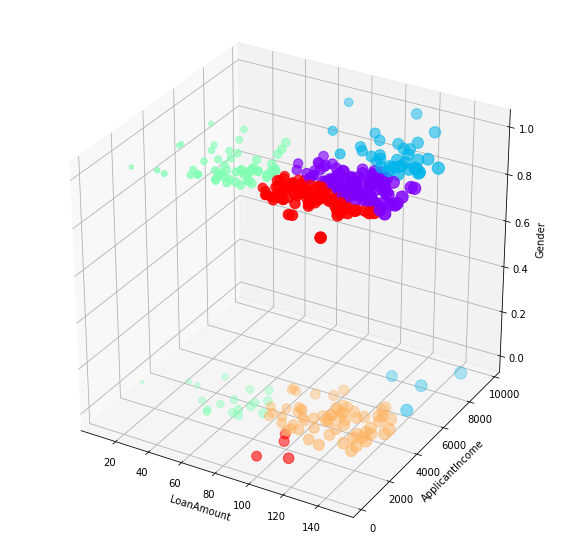

In [ ]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data.LoanAmount,data.ApplicantIncome,data.Gender_Male,cmap='rainbow',s=data.LoanAmount,c=data.Group_3)
ax.set_xlabel('LoanAmount')
ax.set_ylabel('ApplicantIncome')
ax.set_zlabel('Gender')

**Cả 3 yếu tố đều có ảnh hưởng đến việc chia nhóm dữ liệu**